In [6]:
# IMPORT ENVIRONNEMENT
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn import linear_model

#Chargement des données d'études
data = pd.read_csv("hubble_data.csv", sep=",")

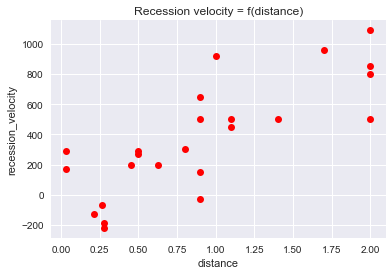

In [127]:
# AFFICHAGE DES DONNEES DE DEPART
ax = plt.axes()
ax = ax.set(xlabel=data.columns[0], ylabel=data.columns[1],)
plt.title("Recession velocity = f(distance)")
plt.plot(data['distance'],data['recession_velocity'],'ro')

In [107]:
# PREPARATION DES DONNEES POUR MODULE DE REGRESSION
# ATTENTION ! les données ne peuvent être fournies au format pandas.SERIES
# sous peine de bug...
# (les series sont au format ligne (1,x) alors que les données doient être données
# au format colonne (x,1), il y a une opération de reshape à faire avant :/
distance_tab = np.array(data['distance']).reshape(-1, 1)
velocity_tab = np.array(data['recession_velocity']).reshape(-1, 1)

# Séparation des données entrainements/tests 
# ratio de séparation : 80% entrainements / 20% tests
DISTtrain, DISTtest, VELOtrain, VELOtest = train_test_split(distance_tab,velocity_tab, train_size=0.8)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [128]:
# lancement du module de regression lineaire
regr = linear_model.LinearRegression()
# determine les coefs de l'approximation sur les données d'entrainements
regr.fit(DISTtrain,VELOtrain)

# calcul du taux de reussite de l'approximation sur les données d'entrainement
error = (1 - regr.score(DISTtrain,VELOtrain))*100
print('taux d''erreurs sur données d''entrainement (%): ', error)
error = (1 - regr.score(DISTtest,VELOtest))*100
print('taux d''erreurs sur données de tests (%): ', error)
# les coefficients
print('Coefficients de regression: \n', regr.coef_)

taux derreurs sur données dentrainement (%):  30.79755181977928
taux derreurs sur données de tests (%):  60.55567477357492
Coefficients de regression: 
 [[452.59628184]]


Text(0.5,1,'Recession velocity = f(distance)')

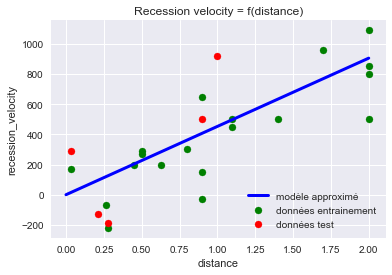

In [129]:
# faire des prediction sur les données tests
velo_pred = regr.predict(DISTtest)

# graphique
# affichage des données
ax = plt.axes()
ax = ax.set(xlabel=data.columns[0], ylabel=data.columns[1],)
plt.scatter(DISTtrain,VELOtrain,color='green', label='données entrainement')
plt.scatter(DISTtest,VELOtest,color='red', label='données test')
# affichage de l'approximation lineaire 
x=np.array(range(3))
y=x*regr.coef_[0]
plt.plot(x,y,color='blue', linewidth=3,label='modèle approximé')
# habillage
plt.legend(loc='lower right');
plt.title("Recession velocity = f(distance)")